In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['text.usetex'] = True
import scienceplots
plt.style.use(['science'])
import itertools
import json
from json import JSONEncoder

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

In [7]:
# ppo parameters
N_QUBITS_list=np.array([2,3,4,5,6,7,8,9,10])

HALF_DEPTH_list=np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
DEPTH_list=[int(2*HALF_DEPTH_list[i]) for i in range(np.size(HALF_DEPTH_list))]

penalty_slope = 0

In [8]:
with open("./data_ps_00/rewards_list_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as rewards_list_ps_00:
    rewards_list = json.load(rewards_list_ps_00)

with open("./data_ps_00/measurements_list_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as measurements_list_ps_00:
    measurements_list = json.load(measurements_list_ps_00)

with open("./data_ps_00/num_measurements_list_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as num_measurements_list_ps_00:
    num_measurements_list = json.load(num_measurements_list_ps_00)

with open("./data_ps_00/avg_rewards_over_ep_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as avg_rewards_over_ep_ps_00:
    avg_rewards_over_ep = json.load(avg_rewards_over_ep_ps_00)

with open("./data_ps_00/avg_lens_per_ep_over_ep_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as avg_lens_per_ep_over_ep_ps_00:
    avg_lens_per_ep_over_ep = json.load(avg_lens_per_ep_over_ep_ps_00)

with open("./data_ps_00/avg_norm_lens_per_ep_over_ep_ps_{penalty_slope}.json".format(penalty_slope=penalty_slope), "r") as avg_norm_lens_per_ep_over_ep_ps_00:
    avg_norm_lens_per_ep_over_ep = json.load(avg_norm_lens_per_ep_over_ep_ps_00)  

In [9]:
# Define the model function
def TanhFit(x, A, B, C):
    return A * np.tanh(B * x) + C

def propagated_error(x, A, B, C, A_err, B_err, C_err):
    # Partial derivatives with respect to each parameter
    dA = np.tanh(B * x)
    dB = A * x * (1 - np.tanh(B * x)**2)
    dC = 1
    # Combine uncertainties
    return np.sqrt((dA * A_err)**2 + (dB * B_err)**2 + (dC * C_err)**2)

[0.29312905 0.2041884  0.67742352]
[0.25486836 0.17223555 0.71972052]
[0.30275899 0.17558321 0.66684054]
[0.22486709 0.13715362 0.74367195]
[0.30650367 0.15570996 0.65701531]
[0.25181742 0.13918482 0.71105342]
[0.31152283 0.14672693 0.64892995]
[0.2733929  0.14201846 0.68592719]
[0.33059766 0.15653666 0.6221002 ]
[0.17090181 0.11823726 0.83413426]
[1.12951978 0.63192715 0.28755702]
[1.5882202  0.5995915  0.63738741]
[2.04446085 0.25203161 1.14136015]
[2.43520992 0.33608042 1.76262669]
[2.96544751 0.19895218 2.2254435 ]
[3.96250673 0.30823961 2.27308019]
[3.75672839 0.17063366 3.49986221]


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

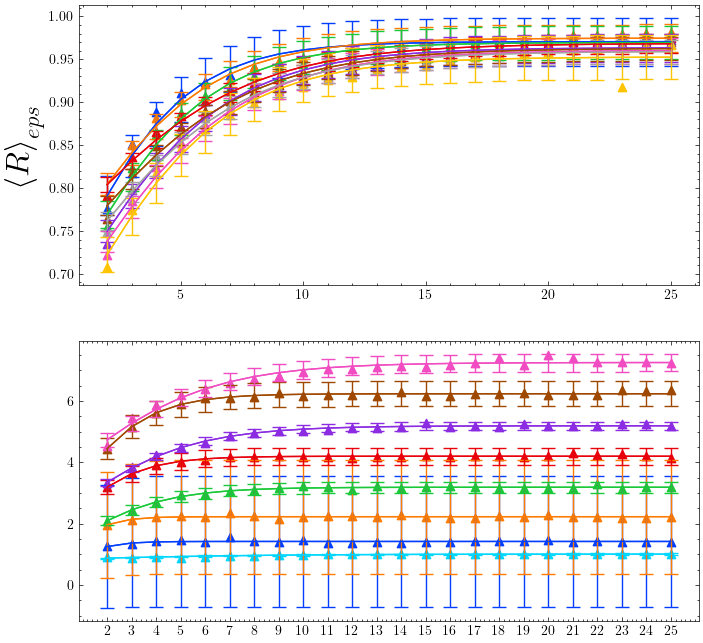

In [30]:
colors = itertools.cycle(sns.color_palette('bright')) 

x1_axis = np.array([int(i) for i in HALF_DEPTH_list])
        
fig, axs = plt.subplot_mosaic([['top'], ['bottom']], figsize=(8, 8))
    
for i in range(np.size(N_QUBITS_list)):
    fit_color = next(colors)  # Assign a unique color to this file

    N_QUBITS = N_QUBITS_list[i]
    y = avg_rewards_over_ep[i]

    # Fit the model to the data
    initial_guess = [.1, .1, .1]  # Initial guess for A, B, C
    params, params_covariance = curve_fit(TanhFit, x1_axis, y, p0=initial_guess)

    print(params)

    # Extract fitted parameters and their uncertainties
    A_fit, B_fit, C_fit = params
    param_errors = np.sqrt(np.diag(params_covariance))  # Standard deviations of parameters
    A_err, B_err, C_err = param_errors

    y_fit = TanhFit(x1_axis, A_fit, B_fit, C_fit)

    y_error = propagated_error(x1_axis, A_fit, B_fit, C_fit, A_err, B_err, C_err)

    axs['top'].scatter(x1_axis, y, marker='^', color=fit_color, label=rf'$N = {N_QUBITS_list[i]}$')
    axs['top'].plot(x1_axis, y_fit, color=fit_color)
    # axs['top'].fill_between(x1_axis, y_fit - y_error, y_fit + y_error, alpha=0.1, color=fit_color)
    axs['top'].errorbar(x1_axis, y_fit, yerr=y_error, color=fit_color, capsize=5)
axs['top'].set_ylabel(r'$\left<R\right>_{eps}$', fontsize=24)
plt.xticks(x1_axis, x1_axis)


for i in range(np.size(N_QUBITS_list)):
    fit_color = next(colors)  # Assign a unique color to this file

    N_QUBITS = N_QUBITS_list[i]
    y = avg_lens_per_ep_over_ep[i]

    # Fit the model to the data
    initial_guess = [1.0, 0.1, 1.5]  # Initial guess for A, B, C
    params, params_covariance = curve_fit(TanhFit, x1_axis, y, p0=initial_guess)

    print(params)

    # Extract fitted parameters and their uncertainties
    A_fit, B_fit, C_fit = params
    param_errors = np.sqrt(np.diag(params_covariance))  # Standard deviations of parameters
    A_err, B_err, C_err = param_errors

    y_fit = TanhFit(x1_axis, A_fit, B_fit, C_fit)

    y_error = propagated_error(x1_axis, A_fit, B_fit, C_fit, A_err, B_err, C_err)

    axs['bottom'].scatter(x1_axis, y, marker='^', color=fit_color, label=rf'$N = {N_QUBITS_list[i]}$')
    axs['bottom'].plot(x1_axis, y_fit, color=fit_color)
    # axs['top'].fill_between(x1_axis, y_fit - y_error, y_fit + y_error, alpha=0.1, color=fit_color)
    axs['bottom'].errorbar(x1_axis, y_fit, yerr=y_error, color=fit_color, capsize=5)
axs['bottom'].set_ylabel(r'$\left<M\right>_{eps}$', fontsize=24)
plt.xticks(x1_axis, x1_axis)
plt.xlabel(r'$D/2$', fontsize=24)

axs['top'].legend(loc='lower right', frameon=True, framealpha=1, fontsize=12)
axs['bottom'].legend(loc='upper right', frameon=True, framealpha=1, fontsize=12)

plt.savefig('alpha_05_depth_rew_len.pdf')

plt.show()

In [31]:
# Define the model function
def LinearFit(x, A, B):
    A = np.asarray(A)
    B = np.asarray(B)
    return A * x + B

def propagated_error(x, A, B, A_err, B_err):
    A = np.asarray(A)
    B = np.asarray(B)
    A_err = np.asarray(A_err)
    B_err = np.asarray(B_err)

    # Calculate the propagated error for each x
    propagated_errors = np.sqrt((x * A_err)**2 + B_err**2)

    return propagated_errors
    

[-0.0081274   0.80317448]
[-0.00934011  0.8707889 ]
[-0.00849179  0.90237214]
[-0.007671    0.92205304]
[-0.00697684  0.936539  ]
[-0.00566037  0.94062192]
[-0.00550173  0.95179472]
[-0.00512619  0.95757228]
[-0.00444344  0.96049039]
[-0.00419318  0.96503535]
[-0.0040135   0.96895713]
[-0.00353969  0.97022383]
[-0.00338928  0.97287534]
[-0.00335521  0.97530741]
[-0.00295827  0.97621717]
[-0.00276675  0.97739364]
[-0.00264103  0.97865826]
[-0.00255829  0.98015235]
[-0.00239588  0.98073367]
[-0.00233887  0.98210636]
[-0.00217363  0.98248722]
[-0.00523524  0.99712533]
[-0.00212626  0.98472196]
[-0.00191969  0.98482667]
[ 0.59553333 -0.51775555]
[ 0.72195    -0.81036667]
[ 0.78938334 -0.94396668]
[ 0.83616667 -1.04211111]
[ 0.87125    -1.15683333]
[ 0.87886667 -1.08875556]
[ 0.8992     -1.20342222]
[ 0.92398333 -1.28434444]
[ 0.91541667 -1.22605556]
[ 0.92691667 -1.28583333]
[ 0.9438     -1.37279999]
[ 0.92733333 -1.27811111]
[ 0.93676667 -1.3176    ]
[ 0.96803333 -1.43853334]
[ 0.9381    

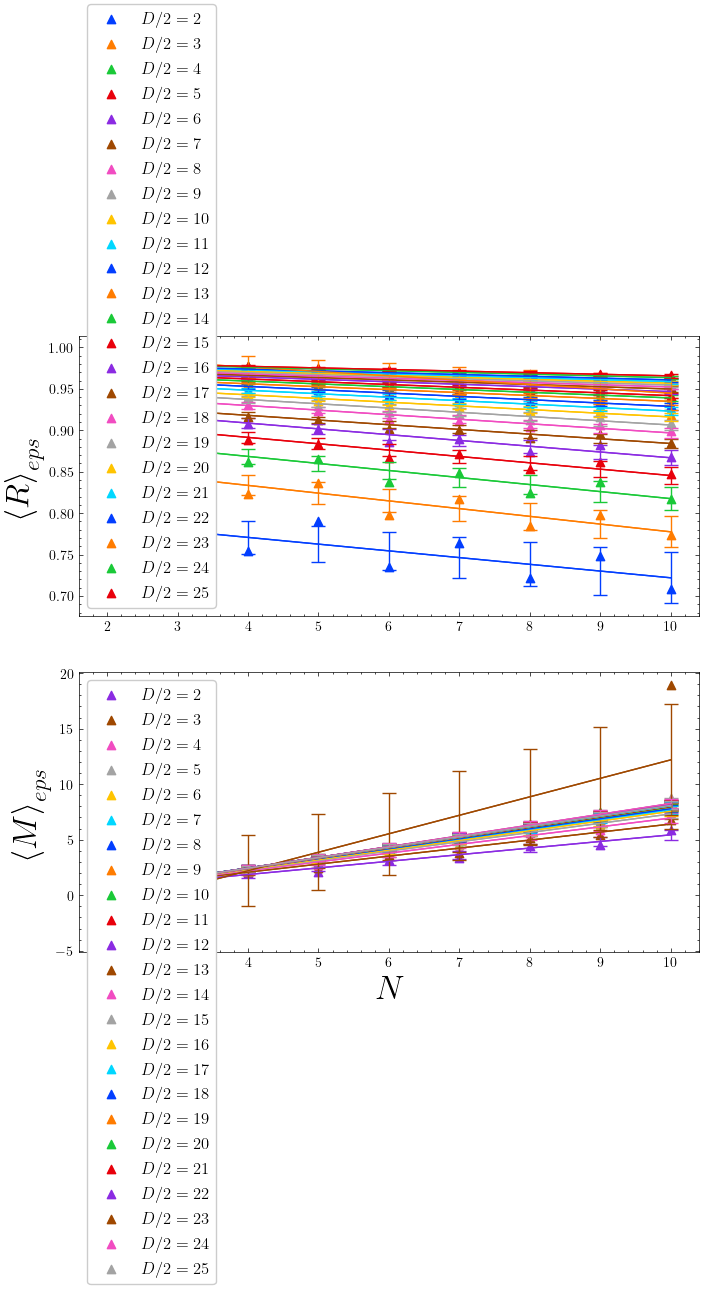

In [32]:
#x_axis = [i+1 for i in range(num_full_learning)], np.size(all_avg_rews)
#have the different learning, put avg_all and variance_all(np.var())
colors = itertools.cycle(sns.color_palette('bright')) 

x2_axis = [int(i) for i in N_QUBITS_list]

avg_rewards_over_ep_N_QUBITS=np.transpose(avg_rewards_over_ep)
avg_lens_per_ep_over_ep_N_QUBITS=np.transpose(avg_lens_per_ep_over_ep)

avg_norm_lens_per_ep_over_ep_N_QUBITS=np.transpose(avg_norm_lens_per_ep_over_ep)

        
fig, axs = plt.subplot_mosaic([['top'],['bottom']], figsize=(8, 8))
    

for i in range(np.size(HALF_DEPTH_list)):
    fit_color = next(colors)  # Assign a unique color to this file

    HALF_DEPTH = HALF_DEPTH_list[i]
    y = avg_rewards_over_ep_N_QUBITS[i]

    # Fit the model to the data
    initial_guess = [.1, .1]  # Initial guess for A, B, C
    params, params_covariance = curve_fit(LinearFit, x2_axis, y, p0=initial_guess)

    print(params)

    # Extract fitted parameters and their uncertainties
    A_fit, B_fit = params
    param_errors = np.sqrt(np.diag(params_covariance))  # Standard deviations of parameters
    A_err, B_err = param_errors

    y_fit = LinearFit(x2_axis, A_fit, B_fit)

    y_error = propagated_error(x2_axis, A_fit, B_fit, A_err, B_err)

    axs['top'].scatter(x2_axis, y, marker='^', color=fit_color, label=f'$D/2 = {HALF_DEPTH_list[i]}$')
    axs['top'].plot(x2_axis, y_fit, color=fit_color)
    # axs['top'].fill_between(x1_axis, y_fit - y_error, y_fit + y_error, alpha=0.1, color=fit_color)
    axs['top'].errorbar(x2_axis, y_fit, yerr=y_error, color=fit_color, capsize=5)
    
axs['top'].set_ylabel(r'$\left<R\right>_{eps}$', fontsize=24)
#axs['top'].set_aspect('equal')

for i in range(np.size(HALF_DEPTH_list)):
    fit_color = next(colors)  # Assign a unique color to this file

    HALF_DEPTH = HALF_DEPTH_list[i]
    y = avg_lens_per_ep_over_ep_N_QUBITS[i]

    # Fit the model to the data
    initial_guess = [.1, .1]  # Initial guess for A, B, C
    params, params_covariance = curve_fit(LinearFit, x2_axis, y, p0=initial_guess)

    print(params)

    # Extract fitted parameters and their uncertainties
    A_fit, B_fit = params
    param_errors = np.sqrt(np.diag(params_covariance))  # Standard deviations of parameters
    A_err, B_err = param_errors

    y_fit = LinearFit(x2_axis, A_fit, B_fit)

    y_error = propagated_error(x2_axis, A_fit, B_fit, A_err, B_err)

    axs['bottom'].scatter(x2_axis, y, marker='^', color=fit_color, label=f'$D/2 = {HALF_DEPTH_list[i]}$')
    axs['bottom'].plot(x2_axis, y_fit, color=fit_color)
    # axs['top'].fill_between(x1_axis, y_fit - y_error, y_fit + y_error, alpha=0.1, color=fit_color)
    axs['bottom'].errorbar(x2_axis, y_fit, yerr=y_error, color=fit_color, capsize=5)

axs['bottom'].set_ylabel(r'$\left<M\right>_{eps}$', fontsize=24)
plt.xticks(x2_axis, x2_axis)

#plt.ylim(0, 11)
#plt.xlim(0, 11)

plt.xlabel(r'$N$', fontsize=24)

axs['top'].legend(loc='lower left', frameon=True, framealpha=1, fontsize=12)
axs['bottom'].legend(loc='upper left', frameon=True, framealpha=1, fontsize=12)

plt.savefig("alpha_05_qubit_rew_len.pdf")
plt.show()

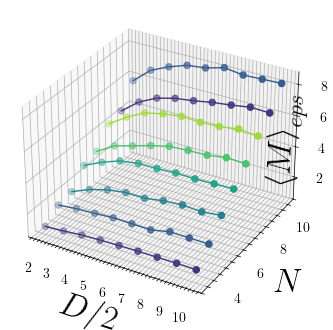

In [ ]:
colors = itertools.cycle(sns.color_palette('viridis'))

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')

# Create a meshgrid
x, y = np.meshgrid(x1_axis, x2_axis)

# Set x-ticks
plt.xticks(x1_axis, x1_axis)

# Plot points and lines
for i in range(len(x2_axis)):
    fit_color = next(colors)
    ax.plot(x[i], y[i], avg_lens_per_ep_over_ep[i], color=fit_color, linestyle='-', markersize=2, markeredgewidth=2)
    ax.scatter(x[i], y[i], avg_lens_per_ep_over_ep[i], color=fit_color)

    
# Set labels
ax.set_xlabel(r'$D/2$', fontsize=24)
ax.set_ylabel(r'$N$', fontsize=24)
ax.set_zlabel(r'$\left<M\right>_{eps}$', fontsize=24)
ax.zaxis.labelpad=-25

plt.savefig("alpha_05_3d.pdf")

# Save the figure
plt.show()

In [24]:
mean_layers_list = [[[] for j in range(np.size(HALF_DEPTH_list))]for j in range(np.size(N_QUBITS_list))]
avg_mean_layers_over_ep=[[] for i in range(np.size(N_QUBITS_list))]


for i in range(np.size(N_QUBITS_list)):
    N_QUBITS = N_QUBITS_list[i]
    for j in range(np.size(HALF_DEPTH_list)):
        HALF_DEPTH = HALF_DEPTH_list[j]
        num, a, b = np.shape(measurements_list[i][j])
        for k in range(num):#k counts the number of episodes
            m_per_layer = [np.sum(layer) for layer in measurements_list[i][j][k]]
            if sum(m_per_layer) != 0:
                layers = [HALF_DEPTH-i for i in range(HALF_DEPTH)]
                mean_layers_list[i][j].append(np.average(layers, weights=m_per_layer)/HALF_DEPTH)
            elif sum(m_per_layer) == 0:
                mean_layers_list[i][j].append(int(0))
        
        avg_mean_layers_over_ep[i].append(np.mean(mean_layers_list[i][j]))

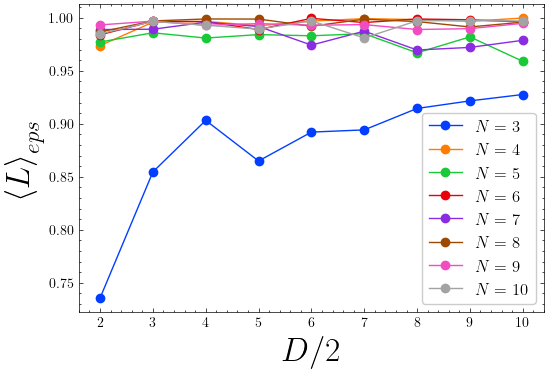

In [ ]:
colors = itertools.cycle(sns.color_palette('bright')) 

fig, axs = plt.subplot_mosaic([['top']], figsize=(6, 4))

for i in range(np.size(N_QUBITS_list)):
    color = next(colors)
    N_QUBITS = N_QUBITS_list[i]
    plt.plot(x1_axis,avg_mean_layers_over_ep[i],label=rf"$N = $ {N_QUBITS}", linestyle='-', marker='o', color=color)
axs['top'].set_xlabel(r'$D/2$', fontsize=24)
axs['top'].set_ylabel(r'$\left<L\right>_{eps}$', fontsize=24)
plt.xticks(x1_axis, x1_axis)

axs['top'].legend(loc='lower right', frameon=True, framealpha=1, fontsize=12)

plt.savefig("alpha_05_depth_layers.pdf")

plt.show()

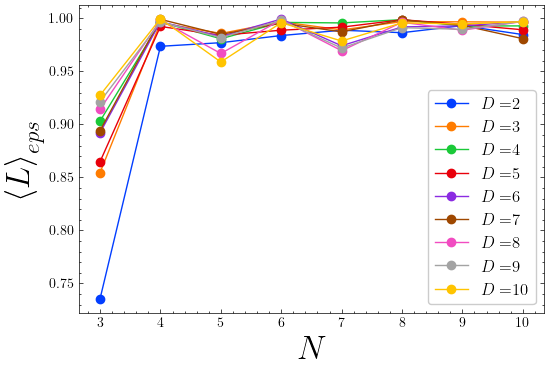

In [ ]:
colors = itertools.cycle(sns.color_palette('bright')) 

fig, axs = plt.subplot_mosaic([['top']], figsize=(6, 4))

avg_mean_layers_over_ep_N_QUBITS=np.transpose(avg_mean_layers_over_ep)

for i in range(np.size(HALF_DEPTH_list)):
    color = next(colors)
    HALF_DEPTH = HALF_DEPTH_list[i]
    plt.plot(x2_axis,avg_mean_layers_over_ep_N_QUBITS[i],label=rf"$D = ${HALF_DEPTH}",linestyle='-', marker='o', color=color)
plt.xlabel(r'$N$', fontsize=24)
plt.ylabel(r'$\left<L\right>_{eps}$', fontsize=24)
plt.xticks(x2_axis, x2_axis)

axs['top'].legend(loc='lower right', frameon=True, framealpha=1, fontsize=12)

plt.savefig("alpha_05_qubit_layers.pdf")

plt.show()